In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (9,6)
!pip install wordcloud
from wordcloud import WordCloud



In [ ]:
from kagglehub import KaggleDatasetAdapter, load_dataset

df = load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "maharshipandya/-spotify-tracks-dataset",
    "dataset.csv"
)
df.head()

/tmp/ipython-input-329-3790439210.py:3: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = load_dataset(


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(114000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Number of unique values in each feature :

In [ ]:
for features in df.columns:
    print(features.ljust(16),df[features].nunique())

Unnamed: 0       114000
track_id         89741
artists          31437
album_name       46589
track_name       73608
popularity       101
duration_ms      50697
explicit         2
danceability     1174
energy           2083
key              12
loudness         19480
mode             2
speechiness      1489
acousticness     5061
instrumentalness 5346
liveness         1722
valence          1790
tempo            45653
time_signature   5
track_genre      114


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

### **POPULARITY FEATURE ANALYSIS**

Top 20 genres with highest average popularity

Top 20 Genres by Average Popularity:

track_genre
pop-film             59.283
k-pop                56.896
chill                53.651
sad                  52.379
grunge               49.594
indian               49.539
anime                48.772
emo                  48.128
sertanejo            47.866
pop                  47.576
progressive-house    46.615
piano                45.273
mandopop             45.025
deep-house           44.808
brazil               44.670
electronic           44.325
pagode               44.298
ambient              44.191
british              43.802
metal                43.705
Name: popularity, dtype: float64


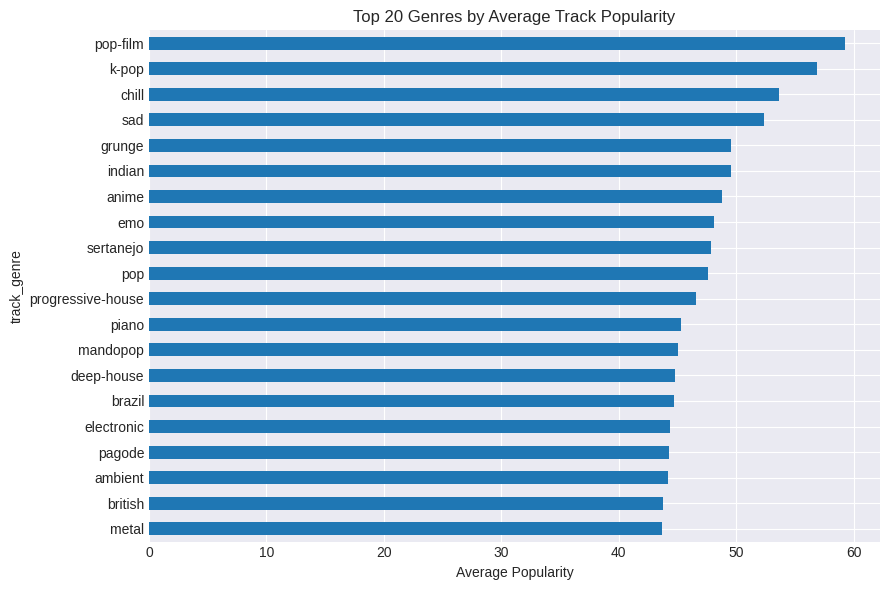

In [ ]:
avg_pop_by_genre = (
    df.groupby('track_genre', as_index=True)['popularity'].mean().sort_values(ascending=False)
)

top20_avg_pop = avg_pop_by_genre.head(20)
print("Top 20 Genres by Average Popularity:\n")
print(top20_avg_pop)

top20_avg_pop.sort_values().plot.barh()
plt.xlabel('Average Popularity')
plt.title('Top 20 Genres by Average Track Popularity')
plt.tight_layout()
plt.show()


Group analysis of popular genres --->     how many teacks produced, and their max duration of track

In [ ]:
genre_stats = (
    df
    .groupby('track_genre', as_index=False)
    .agg(
        avg_popularity = ('popularity', 'mean'),
        total_tracks   = ('popularity', 'size'),
        max_duration   = ('duration_ms', 'max')
    )
    .sort_values('avg_popularity', ascending=False)
)

print(genre_stats.head(10))

   track_genre  avg_popularity  total_tracks  max_duration
81    pop-film          59.283          1000        616509
65       k-pop          56.896          1000       3340672
15       chill          53.651          1000        460225
94         sad          52.379          1000        314500
44      grunge          49.594          1000        546018
55      indian          49.539          1000       1755311
5        anime          48.772          1000        555007
33         emo          48.128          1000        811760
97   sertanejo          47.866          1000        588307
80         pop          47.576          1000        586075


Wordcloud of genres

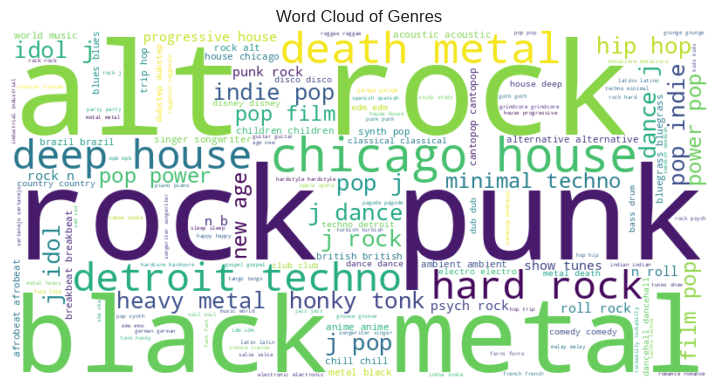

In [ ]:
all_genres = ' '.join(df['track_genre'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()

Word Cloud of Top 50 Genres by Average Popularity

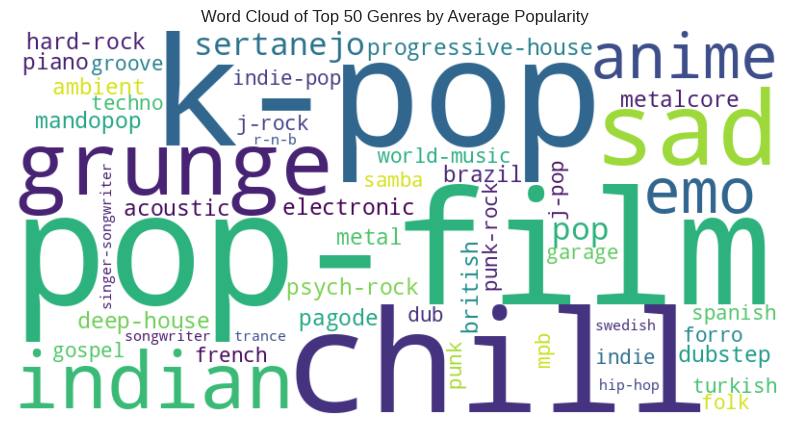

In [ ]:
top50_avg_pop = avg_pop_by_genre.head(50)

wordcloud_data = top50_avg_pop.to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 50 Genres by Average Popularity')
plt.show()

Top 20 artists with highest avg popularity

In [ ]:
top_20_popular_artists=df.groupby('artists',as_index=True)['popularity'].mean().sort_values(ascending=False).head(20)
top_20_popular_artists

,popularity
artists,
Sam Smith;Kim Petras,100.0
Bizarrap;Quevedo,99.0
Manuel Turizo,98.0
Bad Bunny;Chencho Corleone,97.0
Bad Bunny;Bomba Estéreo,94.5
Joji,94.0
Beyoncé,93.0
Rema;Selena Gomez,92.0
Harry Styles,92.0


Top 20 artists who produced highest number of tracks

In [ ]:
track_counts = df.groupby('artists').size()
track_counts.sort_values(ascending=False).head(20)

,0
artists,
The Beatles,279
George Jones,271
Stevie Wonder,236
Linkin Park,224
Ella Fitzgerald,222
Prateek Kuhad,217
Feid,202
Chuck Berry,190
Håkan Hellström,183


Piediagram of top 10 popular genres

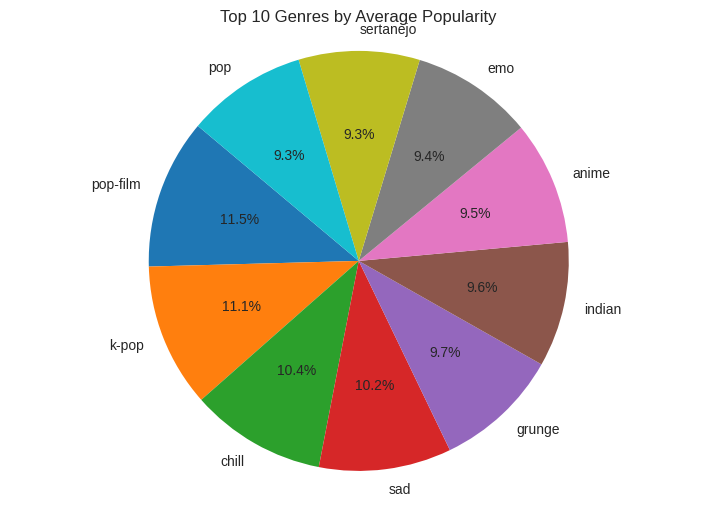

In [ ]:
top_10_genres_pop = avg_pop_by_genre.head(10)

plt.pie(top_10_genres_pop, labels=top_10_genres_pop.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Genres by Average Popularity')
plt.axis('equal')
plt.show()

### **DURATION FEATURE ANALYSIS**

**duration_ms**: The track length in milliseconds

Top 10 Tracks with the Highest Duration

In [ ]:
df_sorted_duration = df.sort_values('duration_ms', ascending=False)
top_10_tracks_duration = df_sorted_duration[['track_name', 'artists', 'duration_ms']].head(10)
print("Top 10 Tracks with the Highest Duration:\n")
top_10_tracks_duration

Top 10 Tracks with the Highest Duration:



,track_name,artists,duration_ms
73617,Unity (Voyage Mix) Pt. 1,Tale Of Us,5237295
10935,Crossing Wires 002 - Continuous DJ Mix,Timo Maas,4789026
10984,Crossing Wires 002 - Continuous DJ Mix,Timo Maas,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,Seth Troxler,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,Loco Dice,4563897
13344,House of Om - Mark Farina - Continuous Mix,Mark Farina,4447520
13245,Live In Tokyo - Continuous Mix,Mark Farina,4339826
13195,Greenhouse Construction,Mark Farina,4334721
27926,"NQ State of Mind, Vol. 1 - Continuous DJ Mix",Lenzman;Dan Stezo,4246206
101390,Ocean Waves Sounds,Ocean Sounds,4120258


Top 10 Artists with the Highest Average Track Duration

In [ ]:
artist_avg_duration = df.groupby('artists')['duration_ms'].mean()

top_10_artists_avg_duration = artist_avg_duration.sort_values(ascending=False).head(10)

print("Top 10 Artists with the Highest Average Track Duration:\n")
top_10_artists_avg_duration

Top 10 Artists with the Highest Average Track Duration:



,duration_ms
artists,
Lenzman;Dan Stezo,4246206.0
El Ruido Blanco,3601693.0
Vacuum Cleaner White Noise,3600120.0
Electric Dreams,3600014.0
Lady Waks,2796984.0
Loco Dice,2517082.0
Buju Banton;Garnett Silk;Sanchez;Tony Rebel;Richie Stephens;Marcia Griffiths;Mad Cobra;General Degree;Nana Mclean;Jack Radics;Terry Ganzie;Thrilla U;Kultra Knox;Dean Fraser,2308806.0
Deekline;Ed Solo,1966895.0
Estas Tonne,1874156.0


Top 10 Genres with the Highest Average Track Duration

In [ ]:
genre_avg_duration = df.groupby('track_genre')['duration_ms'].mean()

top_10_genres_avg_duration = genre_avg_duration.sort_values(ascending=False).head(10)

print("Top 10 Genres with the Highest Average Track Duration:\n")
print(top_10_genres_avg_duration)

Top 10 Genres with the Highest Average Track Duration:

track_genre
detroit-techno    372012.402
minimal-techno    368863.246
chicago-house     366853.868
breakbeat         321762.218
iranian           319709.537
gospel            313218.041
techno            312311.477
black-metal       311103.115
new-age           299070.683
world-music       297195.622
Name: duration_ms, dtype: float64


Plot describing how popularity changes with duration. We can see tracks should be within range of 0-15 minutes to get more audiences


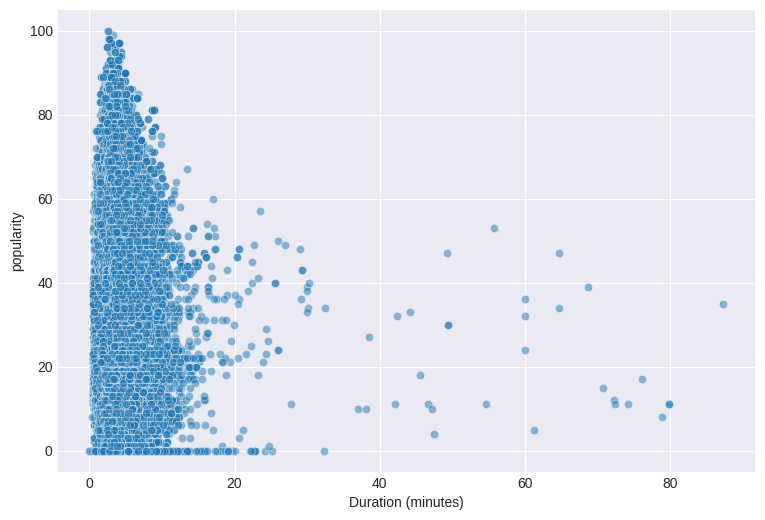

In [ ]:
# Convert to seconds
df['duration_s'] = df['duration_ms'] / 1000

# Or to minutes
df['duration_min'] = df['duration_s'] / 60


sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.5)
plt.xlabel('Duration (minutes)')
plt.show()

### **EXPLICIT FEATURE ANALYSIS**

**explicit**: whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

Top 10 Artists with the Most Explicit Tracks


In [ ]:
explicit_counts = df.groupby('artists')['explicit'].sum()
top_10_explicit_artists = explicit_counts.sort_values(ascending=False).head(10)
print("Top 10 Artists with the Most Explicit Tracks:\n")
top_10_explicit_artists

Top 10 Artists with the Most Explicit Tracks:



,explicit
artists,
Jack Harlow,71
Jhayco;Bad Bunny,64
Marilyn Manson,61
XXXTENTACION,59
Daddy Yankee;Bad Bunny,58
Vybz Kartel,54
Asspera,51
Jhayco,46
Alejo;Feid;ROBI,44


Top 10 GENRES with the Most Explicit Tracks:


In [ ]:
top_explicit_genres=df.groupby('track_genre')['explicit'].sum().sort_values(ascending=False).head(10)
top_explicit_genres

,explicit
track_genre,
comedy,656
emo,465
sad,450
j-dance,391
hardcore,325
hip-hop,319
funk,304
dancehall,302
metalcore,291


Piediagram of distributiob of explicity across all tracks

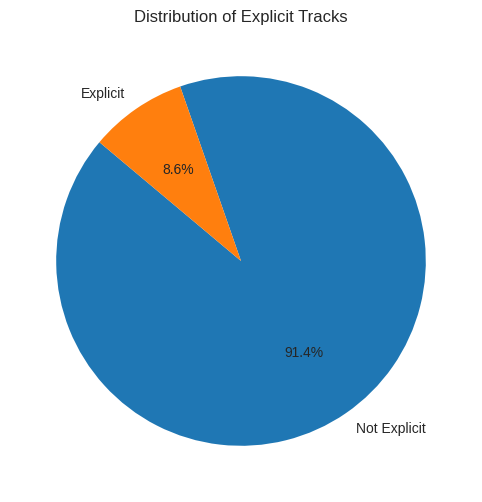

In [ ]:
explicit_distribution = df['explicit'].value_counts()
plt.pie(explicit_distribution, labels=['Not Explicit', 'Explicit'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Explicit Tracks')
plt.show()

### **LOUDNESS FEATURE ANALYSIS**

**loudness**: The overall loudness of a track in decibels (dB)

In [ ]:
df['loudness'].describe()

,loudness
count,114000.000000
mean,-8.258960
std,5.029337
min,-49.531000
25%,-10.013000
50%,-7.004000
75%,-5.003000
max,4.532000


Top 10 Genres with the Highest Average Loudness

In [ ]:
top_10_genres_avg_loudness=df.groupby('track_genre')['loudness'].mean().sort_values(ascending=False).head(10)
print("Top 10 Genres with the Highest Average Loudness:\n")
top_10_genres_avg_loudness

Top 10 Genres with the Highest Average Loudness:



,loudness
track_genre,
j-idol,-3.771215
drum-and-bass,-4.159624
hardstyle,-4.345983
party,-4.411871
metalcore,-4.457694
reggaeton,-4.987124
dubstep,-5.063413
forro,-5.122201
latino,-5.176923


Top 10 Artists with the Highest Average Loudness

In [ ]:
artist_avg_loudness = df.groupby('artists')['loudness'].mean()
top_10_artists_avg_loudness = artist_avg_loudness.sort_values(ascending=False).head(10)
print("Top 10 Artists with the Highest Average Loudness:\n")
top_10_artists_avg_loudness

Top 10 Artists with the Highest Average Loudness:



,loudness
artists,
DJ BRUNO PRADO,1.8210
Dither;Nolz,1.3425
Free Refills,1.2275
DJ Blakes;DJ VST;MC Gedai,1.1040
The Outside Agency,1.0280
Seiko Oomori;Kazunobu Mineta,0.9450
Subtronics,0.9100
DJ Fresh;Fox Stevenson,0.8360
DJ Arthur ZL,0.8300


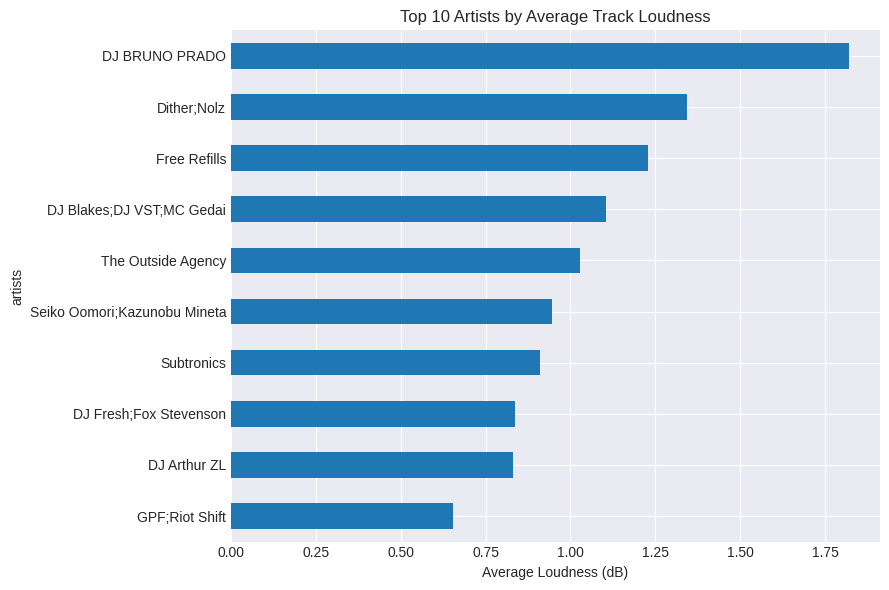

In [ ]:
top_10_artists_avg_loudness.sort_values().plot.barh()
plt.xlabel('Average Loudness (dB)')
plt.title('Top 10 Artists by Average Track Loudness')
plt.tight_layout()
plt.show()

We can see loudness have high correlation with energy and its kind of visually true in below plots


Correlation between Loudness and Energy: 0.76


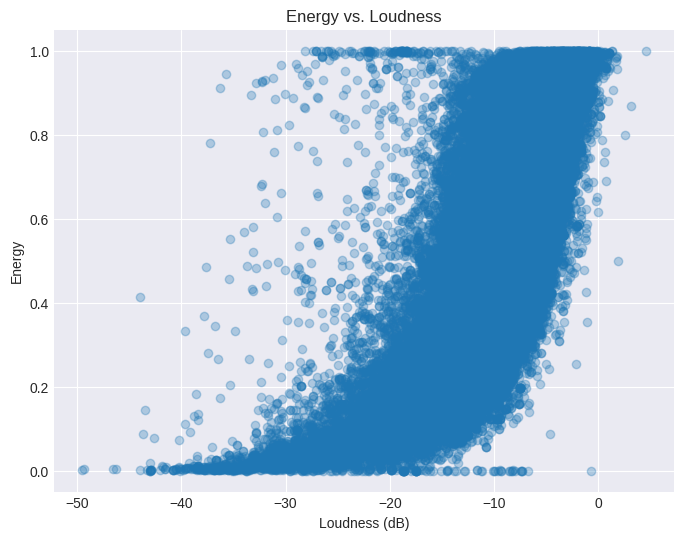

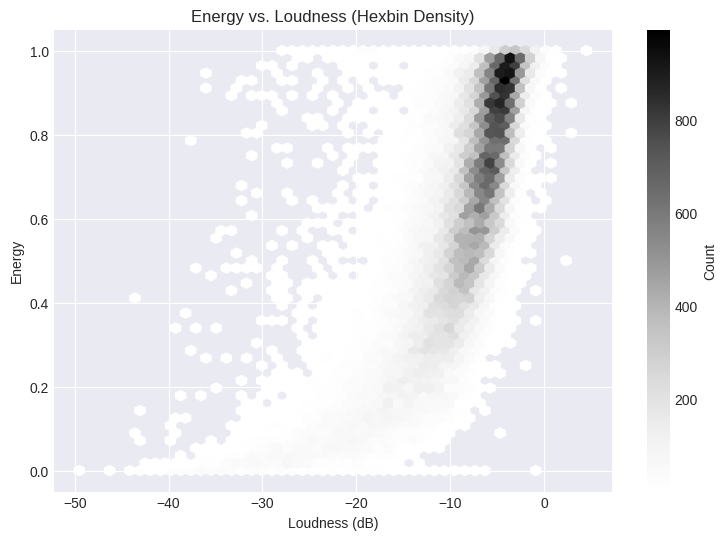

In [ ]:
correlation_loudness_energy = df['loudness'].corr(df['energy'])
print(f"\nCorrelation between Loudness and Energy: {correlation_loudness_energy:.2f}")


plt.figure(figsize=(8,6))
plt.scatter(df['loudness'], df['energy'], alpha=0.3)
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.title('Energy vs. Loudness')
plt.grid(True)
plt.show()

plt.hexbin(df['loudness'], df['energy'], gridsize=50, mincnt=1)
cb = plt.colorbar()
cb.set_label('Count')
plt.xlabel('Loudness (dB)')
plt.ylabel('Energy')
plt.title('Energy vs. Loudness (Hexbin Density)')
plt.show()


### **DANCEABILITY FEATURE ANALYSIS**

**danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most

Top 10 Artists with the Highest Average Danceability

In [ ]:
artist_avg_danceability = df.groupby('artists')['danceability'].mean()

top_10_artists_avg_danceability = artist_avg_danceability.sort_values(ascending=False).head(10)

print("Top 10 Artists with the Highest Average Danceability:\n")
top_10_artists_avg_danceability

Top 10 Artists with the Highest Average Danceability:



,danceability
artists,
DJ Pierre;My Digital Enemy;Hatiras,0.979
Casper & Col'ta,0.978
Vybz Kartel;Tommy Lee,0.975
Electric Slide Dance Party DJ's,0.974
Chip E.;Jamie 3:26,0.974
BaianaSystem;Tropkillaz,0.974
Neo Pistea;0-600;C.R.O;Mike Southside;Coqeéin Montana,0.971
MHD,0.970
Cajmere;Claude VonStroke,0.970


Top 20 Genres with high Average Danceability

Top 20 Genres with high Average Danceability:

        track_genre  danceability
66             kids      0.778906
13    chicago-house      0.766176
89        reggaeton      0.758521
68           latino      0.757057
88           reggae      0.745331
51          hip-hop      0.736154
21        dancehall      0.734169
73   minimal-techno      0.729395
24   detroit-techno      0.722568
67            latin      0.721902
14         children      0.716467
23       deep-house      0.710448
94              sad      0.692378
20            dance      0.687856
105           study      0.685240
109          techno      0.684348
60          j-dance      0.680557
37             funk      0.678184
25            disco      0.676692
1          afrobeat      0.669580


/tmp/ipython-input-355-2272264595.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='danceability', y='track_genre', data=top_20_danceability_genres, palette='viridis')


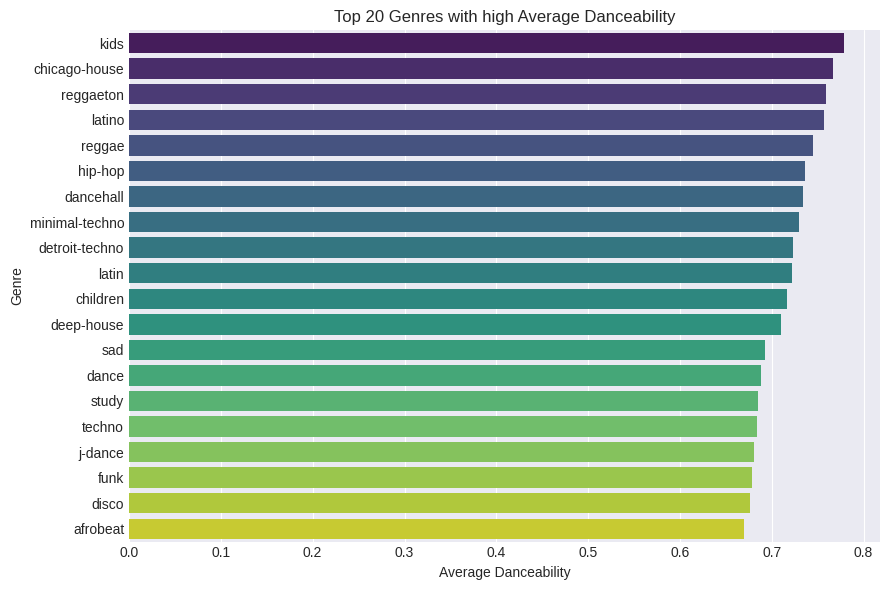

In [ ]:
danceability_by_genre = (
    df.groupby('track_genre', as_index=False)
    ['danceability'].mean().sort_values('danceability', ascending=False)
)

top_20_danceability_genres = danceability_by_genre.head(20)
print("Top 20 Genres with high Average Danceability:\n")
print(top_20_danceability_genres)

sns.barplot(x='danceability', y='track_genre', data=top_20_danceability_genres, palette='viridis')
plt.xlabel('Average Danceability')
plt.ylabel('Genre')
plt.title('Top 20 Genres with high Average Danceability')
plt.tight_layout()
plt.show()

Box plot of danceability across mode. We can see major have higher danceability as they are bright and cheerful

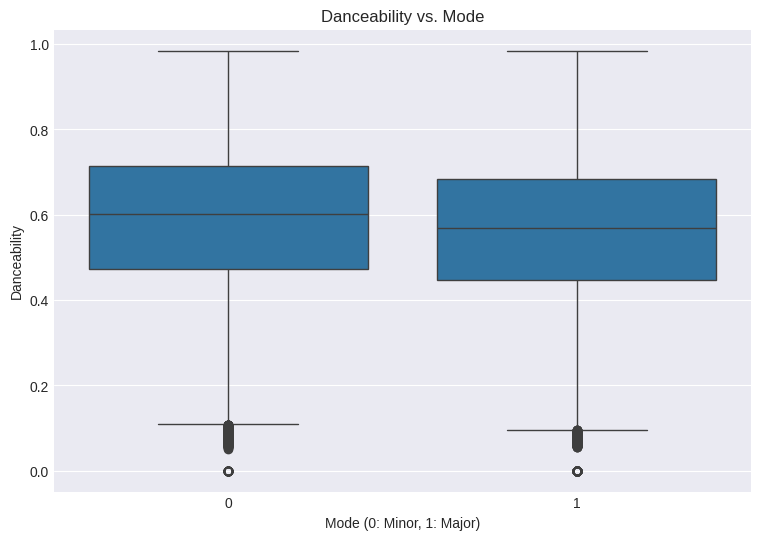


Mean Danceability by Mode:



,danceability
mode,
0,0.582732
1,0.557743


In [ ]:
sns.boxplot(x='mode', y='danceability', data=df)
plt.xlabel('Mode (0: Minor, 1: Major)')
plt.ylabel('Danceability')
plt.title('Danceability vs. Mode')
plt.show()

mean_danceability_by_mode = df.groupby('mode')['danceability'].mean()
print("\nMean Danceability by Mode:\n")
mean_danceability_by_mode

### **MODE FEATURE ANALYSIS**

**Mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0

Major keys generally sound bright and happy, while minor keys often evoke a sense of sadness or melancholy.


Most tracks in our data are majors

In [ ]:
mode_counts = df['mode'].value_counts()

most_popular_mode = mode_counts.idxmax()
count_of_most_popular = mode_counts.max()

print(f"The most popular track mode is: {most_popular_mode}")
print(f"It appears {count_of_most_popular} times in the dataset.")

The most popular track mode is: 1
It appears 72681 times in the dataset.


Top 10 Genres with the Most 'Major' Mode Tracks

In [ ]:
major_mode_by_genre = df[df['mode'] == 1].groupby('track_genre').size()
top_genres_with_major = major_mode_by_genre.sort_values(ascending=False).head(10)
print("Top 10 Genres with the Most 'Major' Mode Tracks:\n")
print(top_genres_with_major)

Top 10 Genres with the Most 'Major' Mode Tracks:

track_genre
honky-tonk           962
country              889
world-music          869
children             867
bluegrass            852
singer-songwriter    846
songwriter           846
sertanejo            843
rock-n-roll          830
gospel               829
dtype: int64


Top 10 Genres with the Most 'Minor' Mode Tracks

In [ ]:
minor_mode_by_genre = df[df['mode'] == 0].groupby('track_genre').size()
top_genres_with_minor = minor_mode_by_genre.sort_values(ascending=False).head(10)
print("Top 10 Genres with the Most 'Minor' Mode Tracks:\n")
top_genres_with_minor

Top 10 Genres with the Most 'Minor' Mode Tracks:



,0
track_genre,
turkish,669
romance,655
deep-house,538
hardstyle,533
drum-and-bass,529
progressive-house,522
hip-hop,521
tango,520
french,518


Piediagram of distribution of mode across tracks

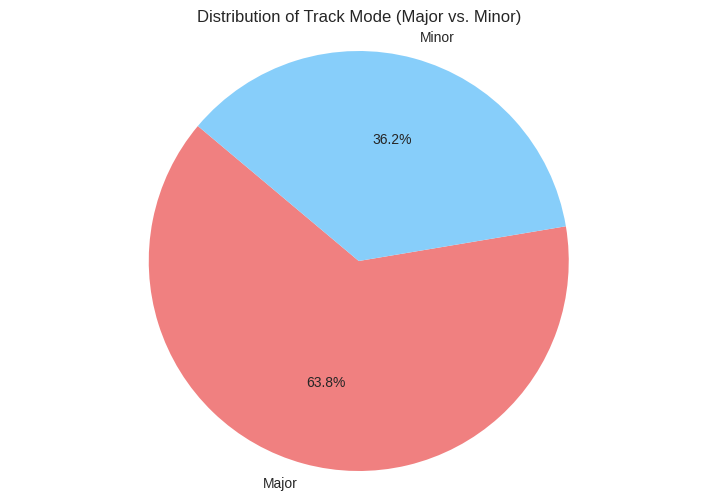

In [ ]:
mode_distribution = df['mode'].value_counts()
plt.pie(mode_distribution, labels=['Major', 'Minor'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Distribution of Track Mode (Major vs. Minor)')
plt.axis('equal')
plt.show()

Bar diagram showing mode distribution in top 10 popular genres

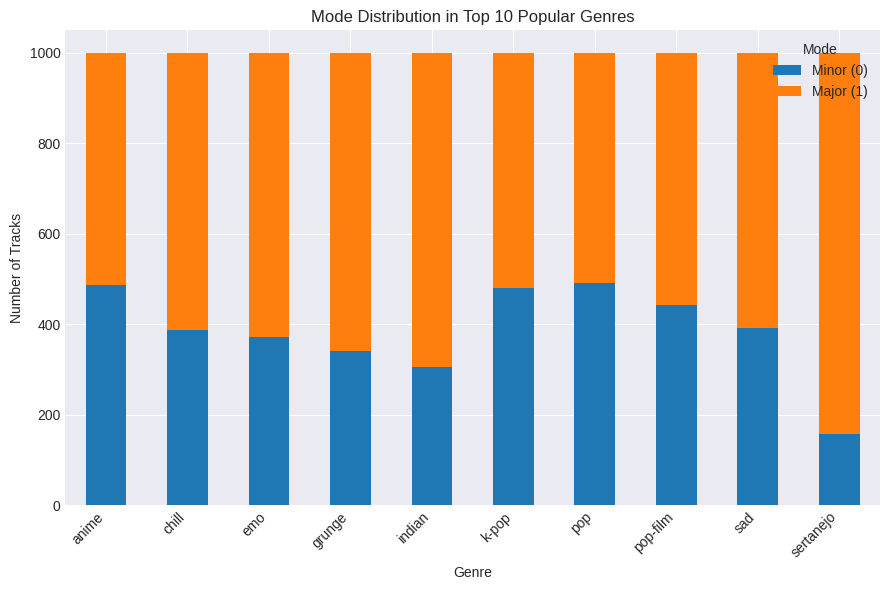

In [ ]:
top_10_genres = avg_pop_by_genre.head(10).index
df_top_genres = df[df['track_genre'].isin(top_10_genres)].copy()
mode_distribution_top_genres = df_top_genres.groupby(['track_genre', 'mode']).size().unstack(fill_value=0)
mode_distribution_top_genres.plot(kind='bar', stacked=True)

plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.title('Mode Distribution in Top 10 Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.legend(['Minor (0)', 'Major (1)'], title='Mode')
plt.tight_layout()
plt.show()

Loudness distribution by mode. seems there is no much of a difference

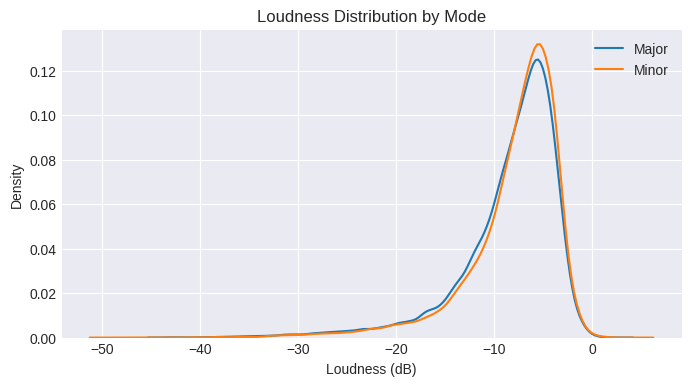

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(df.loc[df['mode']==1, 'loudness'], label='Major')
sns.kdeplot(df.loc[df['mode']==0, 'loudness'], label='Minor')
plt.xlabel('Loudness (dB)')
plt.title('Loudness Distribution by Mode')
plt.legend()
plt.show()


### **SPEECHINESS FEATURE ANALYSIS**

**Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

Top 10 genres with high avg speechiness

/tmp/ipython-input-363-2688065330.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres_speechiness.values, y=top_10_genres_speechiness.index, palette='viridis')


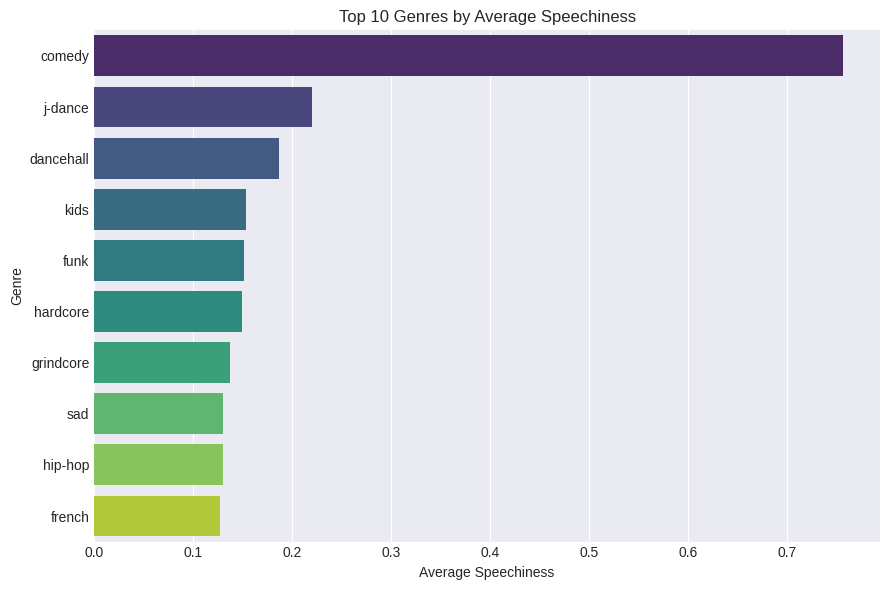

In [ ]:
genre_avg_speechiness = df.groupby('track_genre')['speechiness'].mean().sort_values(ascending=False)

top_10_genres_speechiness = genre_avg_speechiness.head(10)

sns.barplot(x=top_10_genres_speechiness.values, y=top_10_genres_speechiness.index, palette='viridis')
plt.xlabel('Average Speechiness')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Speechiness')
plt.tight_layout()
plt.show()

We'll perform binning as there are different kinds of tracks across this data, we might capture the same castgorical tracks with binning

   speechiness speechiness_bin
0       0.1430  Music (< 0.33)
1       0.0763  Music (< 0.33)
2       0.0557  Music (< 0.33)
3       0.0363  Music (< 0.33)
4       0.0526  Music (< 0.33)

Track counts by speechiness bin:
 speechiness_bin
Music (< 0.33)                     110417
Mixed (such as rap) (0.33–0.66)      2703
Speech (> 0.66)                       880
Name: count, dtype: int64


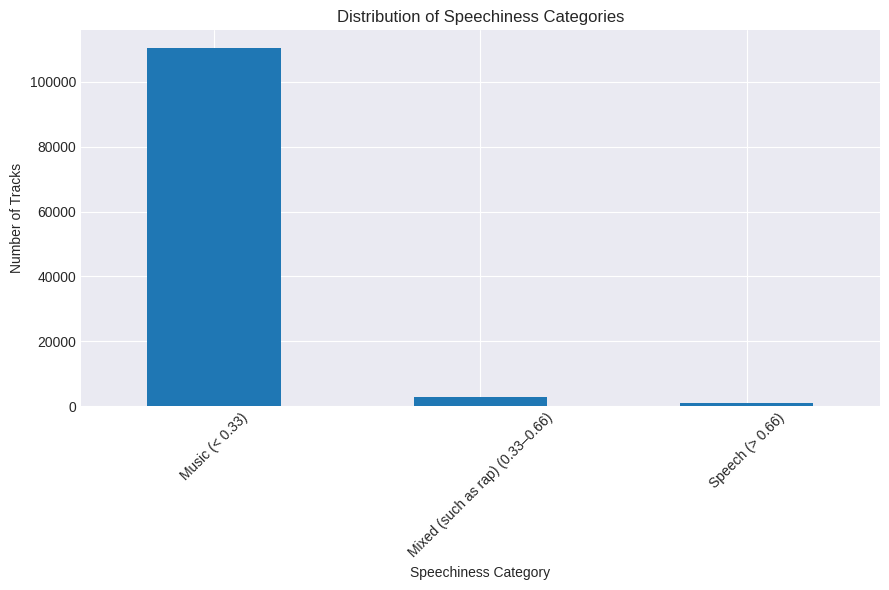

In [ ]:
bins = [0.0, 0.33, 0.66, 1.0]
labels = ['Music (< 0.33)', 'Mixed (such as rap) (0.33–0.66)', 'Speech (> 0.66)']

df['speechiness_bin'] = pd.cut(df['speechiness'], bins=bins, labels=labels, include_lowest=True)

print(df[['speechiness', 'speechiness_bin']].head())

bin_counts = df['speechiness_bin'].value_counts().reindex(labels)
print("\nTrack counts by speechiness bin:\n", bin_counts)


bin_counts.plot.bar()
plt.xlabel('Speechiness Category')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Speechiness Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 features most correlated (abs) with speechiness

In [ ]:
num_cols = df.select_dtypes(include=['float64','int64']).columns.tolist()

corrs = df[num_cols].corr()['speechiness'].drop('speechiness').abs().sort_values(ascending=False)

print("Top 5 features most correlated (abs) with speechiness:\n")
print(corrs.head(5))


Top 5 features most correlated (abs) with speechiness:

liveness            0.205219
energy              0.142509
danceability        0.108626
instrumentalness    0.089616
duration_s          0.062600
Name: speechiness, dtype: float64


Kdeplot showinf distribution of speechiness across genres

/tmp/ipython-input-366-3426378069.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Genre')


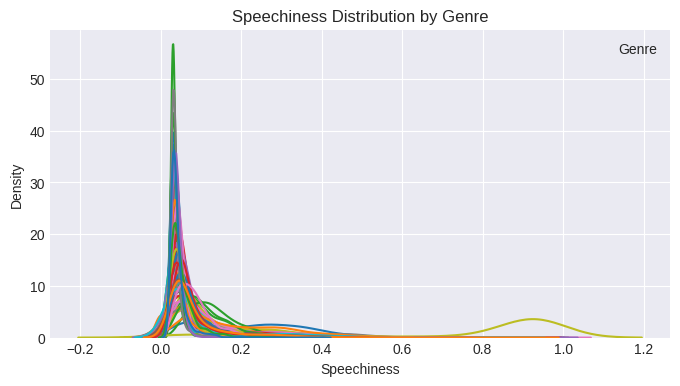

In [ ]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df, x='speechiness', hue='track_genre', common_norm=False, palette='tab10')
plt.xlabel('Speechiness')
plt.title('Speechiness Distribution by Genre')
plt.legend(title='Genre')
plt.show()

### **ACOUSTICNESS FEATURE ANALYSIS**

An acoustic track is a musical piece performed using only acoustic instruments, meaning instruments that produce sound naturally without electronic amplification

**Acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic



In [ ]:
df['acousticness'].describe()

,acousticness
count,114000.000000
mean,0.314910
std,0.332523
min,0.000000
25%,0.016900
50%,0.169000
75%,0.598000
max,0.996000


Top 10 Acoustic Tracks and Their Artists


In [ ]:
acoustic_tracks = df.sort_values('acousticness', ascending=False)
top_10_acoustic_tracks = acoustic_tracks[['track_name', 'artists', 'acousticness']].head(10)
print("Top 10 Acoustic Tracks and Their Artists:\n")
top_10_acoustic_tracks

Top 10 Acoustic Tracks and Their Artists:



,track_name,artists,acousticness
39225,"Carnaval, Op. 9: No. 3, Arlequin (Live in Japa...",Robert Schumann;Pavel Nersessian,0.996
16872,"Adagio in F, K.410",Wolfgang Amadeus Mozart;Holliger Wind Ensemble,0.996
101794,Soft Baby Lullabies,Baby Sleep Music;Baby Lullaby;Monarch Baby Lul...,0.996
16257,"Carnaval, Op. 9: No. 2, Pierrot (Live in Japan...",Robert Schumann;Pavel Nersessian,0.996
32635,Avril 14th,Aphex Twin,0.996
26962,In a World of My Own,Walt's Piano,0.996
79475,Zakochany,Aleksy Wysocki,0.996
16725,"Piano Sonata No.14 in C Minor, K. 457: 2c. Ada...",Wolfgang Amadeus Mozart;Claire-Marie Le Guay,0.996
101972,Nap in the Afternoon Box Fan,Binaural Beats;White Noise Babies;Binaural Bea...,0.996
76220,"Jeux d'enfants, Op. 22 WD 56: 3. La poupée",Georges Bizet;Katia Labèque;Marielle Labèque,0.996


Top 20 genres by high average acousticness

/tmp/ipython-input-369-2914226915.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_genres_acousticness.values, y=top_20_genres_acousticness.index, palette='viridis')


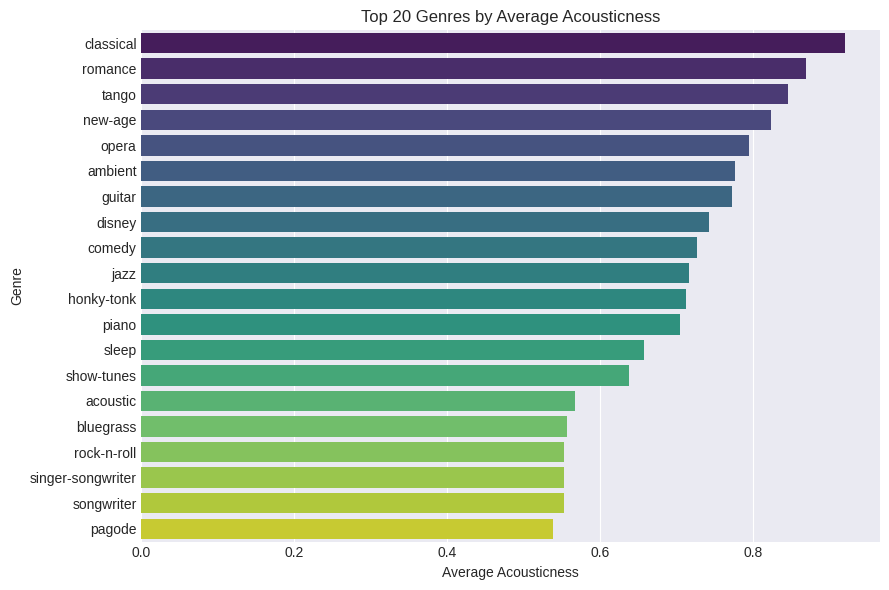

In [ ]:
genre_avg_acousticness = df.groupby('track_genre')['acousticness'].mean().sort_values(ascending=False)

top_20_genres_acousticness = genre_avg_acousticness.head(20)

sns.barplot(x=top_20_genres_acousticness.values, y=top_20_genres_acousticness.index, palette='viridis')
plt.xlabel('Average Acousticness')
plt.ylabel('Genre')
plt.title('Top 20 Genres by Average Acousticness')
plt.tight_layout()
plt.show()



Barplot showing distribution of acousticness

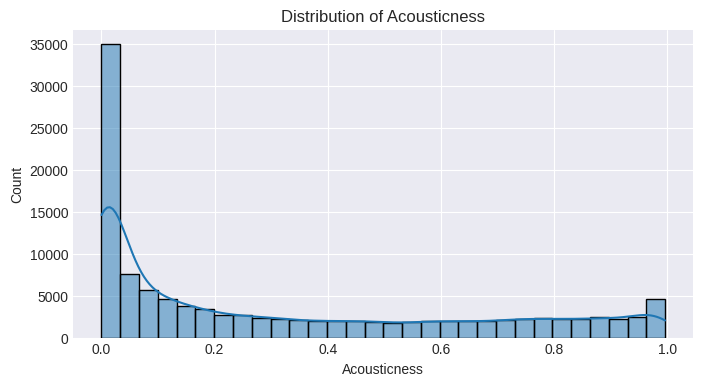

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['acousticness'], bins=30, kde=True)
plt.xlabel('Acousticness')
plt.title('Distribution of Acousticness')
plt.show()

Binning acousticness

In [ ]:
bins = [0.0, 0.25, 0.75, 1.0]
labels = ['Electronic (<0.25)', 'Mixed (0.25–0.75)', 'Acoustic (>0.75)']
df['acoustic_bin'] = pd.cut(df['acousticness'], bins=bins, labels=labels, include_lowest=True)

print(df['acoustic_bin'].value_counts())


acoustic_bin
Electronic (<0.25)    64217
Mixed (0.25–0.75)     30616
Acoustic (>0.75)      19167
Name: count, dtype: int64


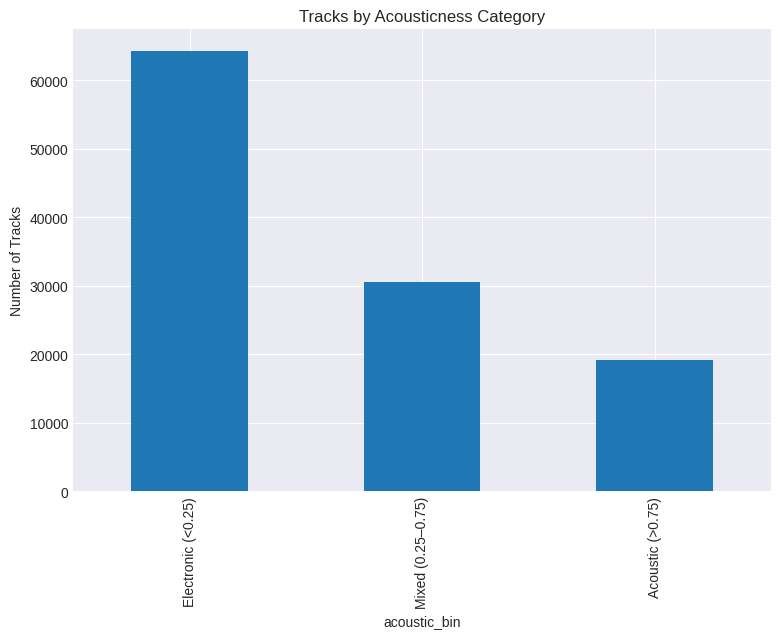

In [ ]:
df['acoustic_bin'].value_counts().reindex(labels).plot.bar()
plt.ylabel('Number of Tracks')
plt.title('Tracks by Acousticness Category')
plt.show()


Acousticness Distribution Across Top 10 Most Acoustic Genres

/tmp/ipython-input-373-3515624342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='acousticness', y='track_genre', data=df_top_acoustic, inner='quartile', palette='viridis', order=top_10_acoustic_genres)


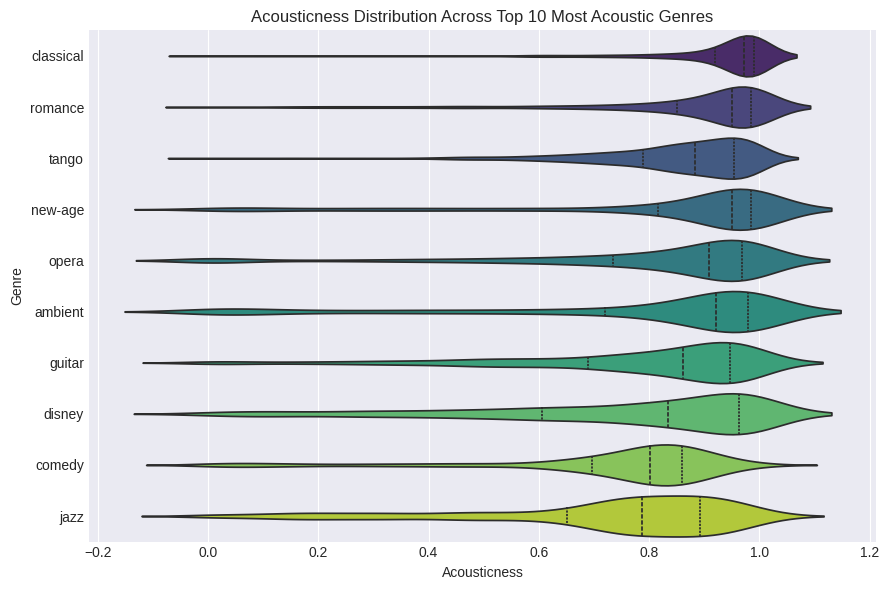

In [ ]:
top_10_acoustic_genres = genre_avg_acousticness.head(10).index.tolist()
df_top_acoustic = df[df['track_genre'].isin(top_10_acoustic_genres)]

sns.violinplot(x='acousticness', y='track_genre', data=df_top_acoustic, inner='quartile', palette='viridis', order=top_10_acoustic_genres)
plt.xlabel('Acousticness')
plt.ylabel('Genre')
plt.title('Acousticness Distribution Across Top 10 Most Acoustic Genres')
plt.tight_layout()
plt.show()


### **INSTRUMENTALNESS FEATURE ANALYSIS**

**instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

Top 10 Artists with the Highest Average Instrumentalness



In [ ]:
artist_avg_instrumentalness = df.groupby('artists')['instrumentalness'].mean().sort_values(ascending=False)

top_10_artists_avg_instrumentalness = artist_avg_instrumentalness.head(10)

print("Top 10 Artists with the Highest Average Instrumentalness:\n")
print(top_10_artists_avg_instrumentalness)



Top 10 Artists with the Highest Average Instrumentalness:

artists
Sleep Baby Sleep;Baby Sleep Through the Night;Sweet Baby Sleep Baby                                               1.000
El Ruido Blanco                                                                                                   1.000
Sleep Miracle                                                                                                     1.000
Soothing White Noise for Relaxation;Sleepicious;Rest & Relax Nature Sounds Artists;Sounds of Nature Relaxation    1.000
Sleep Baby Sleep;Rain Sounds;Calm Children Collection;Soothing Nature Sounds;Rain Sounds & Nature Sounds          0.999
Sleep Baby Sleep;Meditation Spa;White Noise Therapy;Rain Spa;Rain Shower                                          0.999
Loopable;Verter la lluvia                                                                                         0.999
Vacuum Cleaner White Noise;Sleep Sound Library;Sleepy Sounds;Messy Floor;White Noise Makers  

Top 20 Genres by Average Instrumentalness

/tmp/ipython-input-375-1826772067.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_genres_instrumentalness.values, y=top_20_genres_instrumentalness.index, palette='viridis') # Using 'viridis' palette


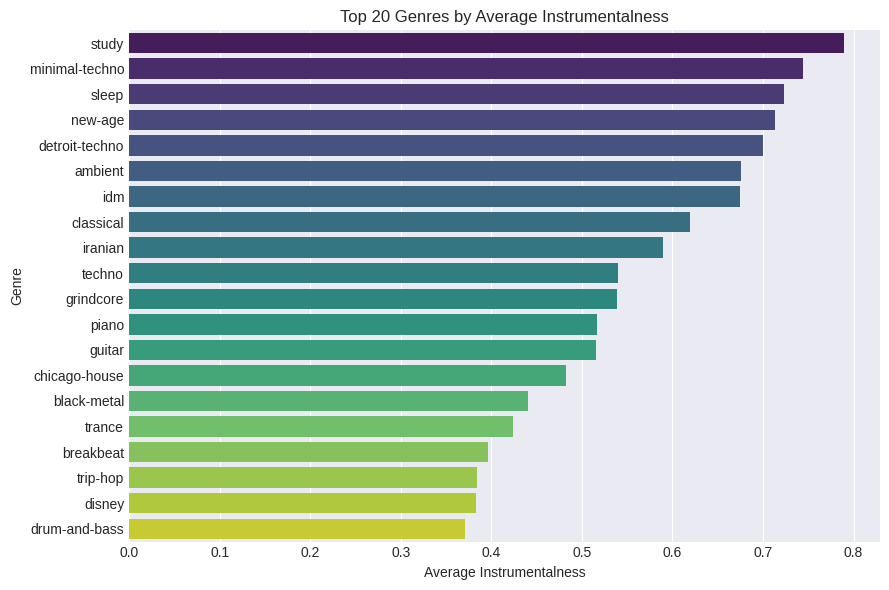

In [ ]:
genre_avg_instrumentalness = df.groupby('track_genre')['instrumentalness'].mean().sort_values(ascending=False)
top_20_genres_instrumentalness = genre_avg_instrumentalness.head(20)

sns.barplot(x=top_20_genres_instrumentalness.values, y=top_20_genres_instrumentalness.index, palette='viridis') # Using 'viridis' palette

plt.xlabel('Average Instrumentalness')
plt.ylabel('Genre')
plt.title('Top 20 Genres by Average Instrumentalness')
plt.tight_layout()
plt.show()

### **LIVELINESS FEATURE ANALYSIS**

**liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

Top 10 Artists with the Highest Average Liveliness



In [ ]:
artist_avg_liveliness = df.groupby('artists')['liveness'].mean().sort_values(ascending=False)

top_10_artists_liveliness = artist_avg_liveliness.head(10)

print("Top 10 Artists with the Highest Average Liveliness:\n")
print(top_10_artists_liveliness)

top_10_artists_list = top_10_artists_liveliness.index.tolist()

df_top_artists_liveness = df[df['artists'].isin(top_10_artists_list)]

artist_genre = df_top_artists_liveness.groupby('artists')['track_genre'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown')

top_artists_liveliness_genre = pd.DataFrame({
    'Average Liveliness': top_10_artists_liveliness,
    'Most Frequent Genre': artist_genre.loc[top_10_artists_list]
})

print("\nTop Artists with High Average Liveliness and Their Most Frequent Genre:\n")
top_artists_liveliness_genre

Top 10 Artists with the Highest Average Liveliness:

artists
Ferrugem;Tiee                               1.000
Magneto;Sentidos Opuestos;Lynda             0.990
Sorriso Maroto;Belo                         0.989
Fania All Stars;Celia Cruz;Ismael Rivera    0.989
Ministério Sarando a Terra Ferida           0.988
Angel Parra Trio;Julian Peña                0.987
Zeca Pagodinho;Chico Da Curimba             0.987
Preto no Branco;Kivitz                      0.987
Grupo Fundo De Quintal;Beth Carvalho        0.986
Péricles;Chrigor                            0.986
Name: liveness, dtype: float64

Top Artists with High Average Liveliness and Their Most Frequent Genre:



,Average Liveliness,Most Frequent Genre
artists,,
Ferrugem;Tiee,1.000,pagode
Magneto;Sentidos Opuestos;Lynda,0.990,spanish
Sorriso Maroto;Belo,0.989,pagode
Fania All Stars;Celia Cruz;Ismael Rivera,0.989,salsa
Ministério Sarando a Terra Ferida,0.988,brazil
Angel Parra Trio;Julian Peña,0.987,j-rock
Zeca Pagodinho;Chico Da Curimba,0.987,samba
Preto no Branco;Kivitz,0.987,groove
Grupo Fundo De Quintal;Beth Carvalho,0.986,pagode


Top 10 Tracks with the Highest Liveness






In [ ]:
top_10_lively_tracks = df.sort_values('liveness', ascending=False)[['track_name', 'artists', 'liveness']].head(10)
print("Top 10 Tracks with the Highest Liveness:\n")
top_10_lively_tracks


Top 10 Tracks with the Highest Liveness:



,track_name,artists,liveness
77642,Fortaleza / Tempo / Lugarzinho (Participação e...,Ferrugem;Tiee,1.000
90597,Solito Con las Estrellas / Yolanda (with Jorge...,Marco Antonio Muñiz;Jorge Muñiz;Mariano Perez,1.000
84818,"Another Brick in the Wall, (Pt. 2) - Live",Pink Floyd,0.997
12329,介乎法國與旺角的詩意 - Live,my little airport,0.995
101581,"Summer Rain Sleep Relaxation Sounds, Pt. 2",Sleepy Times;Sample Rain Library;Nature Record...,0.994
44715,"In the End - Live at Live 8, Benjamin Franklin...",Linkin Park,0.994
46245,Wonderful Days,Charly Lownoise;Mental Theo,0.994
100892,El Genio Del Dub - Versión Remasterizada (Live),Los Fabulosos Cadillacs,0.993
79286,"Shameless - Live at Yankee Stadium, Bronx, NY ...",Billy Joel,0.993
44897,"Bleed the Freak - Live at the Moore Theatre, S...",Alice In Chains,0.992


Top 10 Genres by Average Liveness.

we can see comedy got highest liveliness as its a performative art which involves live audience

/tmp/ipython-input-378-3961329962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres_liveness.values, y=top_10_genres_liveness.index, palette='viridis') # Using 'viridis' palette


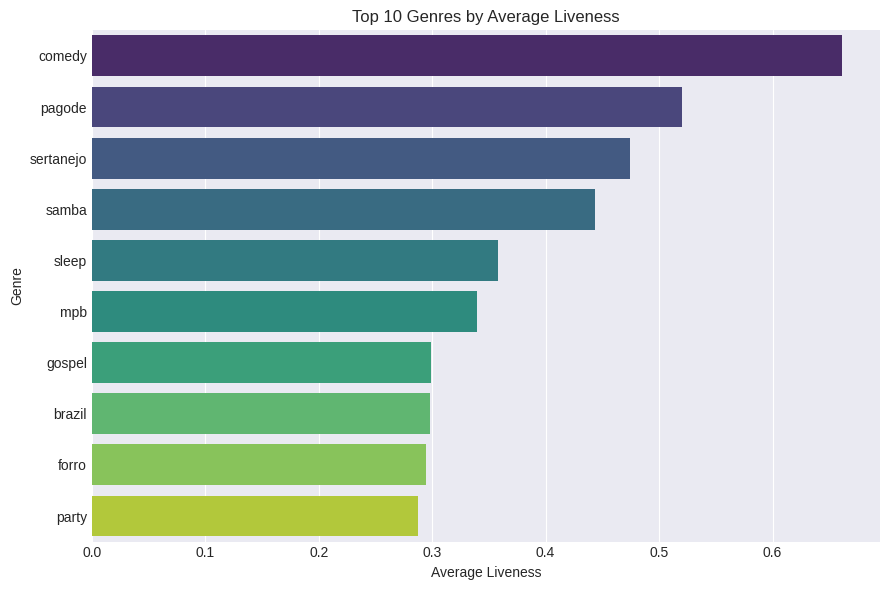

In [ ]:
genre_avg_liveness = df.groupby('track_genre')['liveness'].mean().sort_values(ascending=False)
top_10_genres_liveness = genre_avg_liveness.head(10)
sns.barplot(x=top_10_genres_liveness.values, y=top_10_genres_liveness.index, palette='viridis') # Using 'viridis' palette

plt.xlabel('Average Liveness')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Liveness')
plt.tight_layout()
plt.show()

### **VALENCE FEATURE ANALYSIS**

**valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

Top 10 Genres with High Average Valence

Top 10 Genres with High Average Valence:

track_genre
salsa         0.814838
forro         0.760693
rockabilly    0.726951
afrobeat      0.698619
ska           0.696720
children      0.694287
samba         0.693409
pagode        0.687978
party         0.681235
kids          0.680864
Name: valence, dtype: float64


/tmp/ipython-input-379-619165226.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres_valence.values, y=top_10_genres_valence.index, palette='viridis')


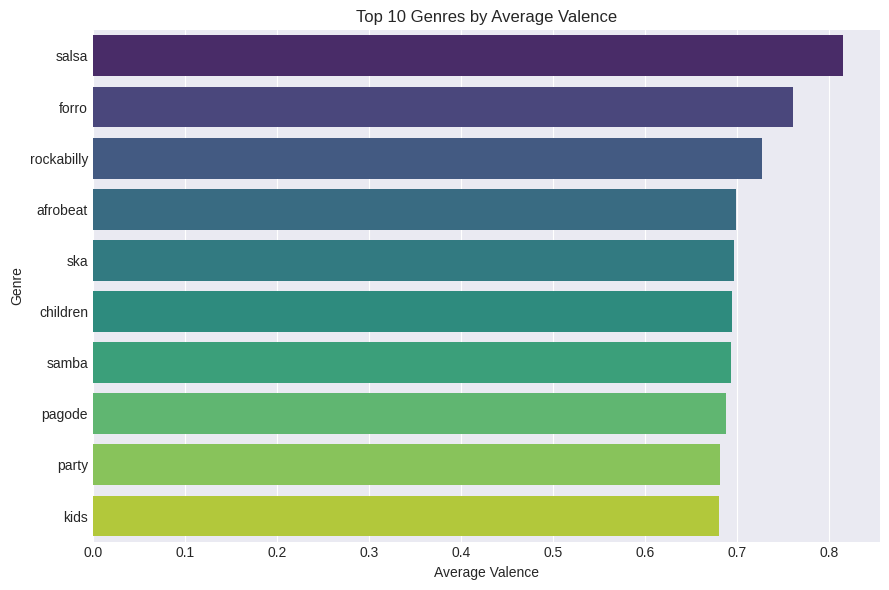

In [ ]:
genre_avg_valence = df.groupby('track_genre')['valence'].mean().sort_values(ascending=False)
top_10_genres_valence = genre_avg_valence.head(10)

print("Top 10 Genres with High Average Valence:\n")
print(top_10_genres_valence)

sns.barplot(x=top_10_genres_valence.values, y=top_10_genres_valence.index, palette='viridis')
plt.xlabel('Average Valence')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Valence')
plt.tight_layout()
plt.show()

Top 10 Artists with High Valence and their Genre


In [ ]:
artist_valence_genre = df.groupby('artists').agg(
    avg_valence=('valence', 'mean'),
    mode_genre=('track_genre', lambda x: x.mode()[0])
).sort_values('avg_valence', ascending=False)

top_10_artists_high_valence = artist_valence_genre.head(10)

print("Top 10 Artists with High Valence and their Genre:\n")
top_10_artists_high_valence


Top 10 Artists with High Valence and their Genre:



,avg_valence,mode_genre
artists,,
Cody;Heart;Mr. Primm;Scatter;K.Flay,0.992,kids
mc jhenny;DJ Ruan da VK;Rafael Foxx;IURY FERNANDES,0.989,funk
Mikis Theodorakis;Antonis Kalogiannis,0.988,guitar
Canciones Infantiles;Musica Infantil;Rondas Infantiles,0.988,children
Soulsearcher,0.984,deep-house
Herbert Grönemeyer,0.983,german
Skankin' Pickle,0.983,ska
Itsy Bitsy Spider Kids,0.983,children
Duo Tiempo de Sol,0.983,latino


### **TEMPO FEATURE ANALYSIS**

**tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

Top 10 Genres with the Highest Average Tempo


Top 10 Genres with the Highest Average Tempo:

track_genre
drum-and-bass    155.241712
happy            152.908962
hardstyle        146.837452
forro            140.362197
j-idol           136.112004
power-pop        134.651615
dubstep          133.631709
punk             133.600518
trance           133.276726
breakbeat        133.030213
Name: tempo, dtype: float64


/tmp/ipython-input-381-3093482282.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres_tempo.values, y=top_10_genres_tempo.index, palette='viridis')


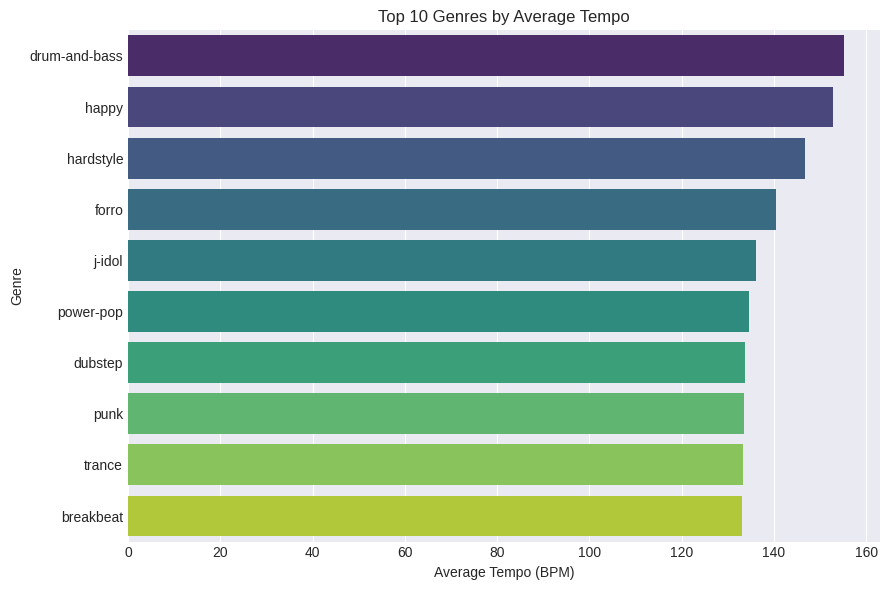

In [ ]:
genre_avg_tempo = df.groupby('track_genre')['tempo'].mean().sort_values(ascending=False)

top_10_genres_tempo = genre_avg_tempo.head(10)

print("Top 10 Genres with the Highest Average Tempo:\n")
print(top_10_genres_tempo)

sns.barplot(x=top_10_genres_tempo.values, y=top_10_genres_tempo.index, palette='viridis')
plt.xlabel('Average Tempo (BPM)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Tempo')
plt.tight_layout()
plt.show()

Top 10 Artists with the Highest Average Tempo


In [ ]:
artist_avg_tempo = df.groupby('artists')['tempo'].mean().sort_values(ascending=False)

top_10_artists_high_tempo = artist_avg_tempo.head(10)

print("Top 10 Artists with the Highest Average Tempo:\n")
print(top_10_artists_high_tempo)

Top 10 Artists with the Highest Average Tempo:

artists
Dendipappey                               220.039
Krafty Kuts;Krossbow                      219.693
Tony Dize;Yandel                          214.024
Philip Glass;Víkingur Ólafsson            213.848
Yemi Alade;Angelique Kidjo                213.674
Flying Lotus;Devin Tracy                  212.276
Personal and The Pizzas                   211.945
那英                                        210.534
Brian Stokes Mitchell;Ragtime Ensemble    210.470
阿涵                                        208.225
Name: tempo, dtype: float64


Top 10 Artists with the Highest Average Tempo


In [ ]:
top_10_tracks_tempo = df.sort_values('tempo', ascending=False)[['track_name', 'artists', 'tempo']].head(10)

print("Top 10 Tracks with the Highest Tempo:\n")
top_10_tracks_tempo


Top 10 Tracks with the Highest Tempo:



,track_name,artists,tempo
8619,Call The Doctor,J.J. Cale,243.372
111908,Undenied,Portishead,222.605
26681,Hip Hip Pooh Rah,Billboard Baby Lullabies,220.525
26638,Heffalumps and Woozles,Billboard Baby Lullabies,220.084
1087,Makoti,Hugh Masekela,220.081
1136,Makoti,Hugh Masekela,220.081
1144,Makoti,Hugh Masekela,220.081
94759,Goodbye to a world,Dendipappey,220.039
59251,When There Was Nothing,Crows in the Rain,219.971
10195,Feel Like Jumpin - Krossbow Remix,Krafty Kuts;Krossbow,219.693


### **TIME_SIGNATURE FEATURE ANALYSIS**

 Time_signature represents the notated time signature of a track—that is, how many beats are in each bar (the top number) and which note value (the bottom number) constitutes one beat. In practice:

A value of 4 means “4/4 time” (four quarter‑note beats per bar), the most common pop/rock/dance signature.

A value of 3 means “3/4 time” (three quarter‑note beats per bar), like a waltz.

A value of 5, 6, 7, etc. indicate more unusual or “odd” meters (e.g. progressive rock, jazz, world music).

time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

Distribution of time signature across all tracks

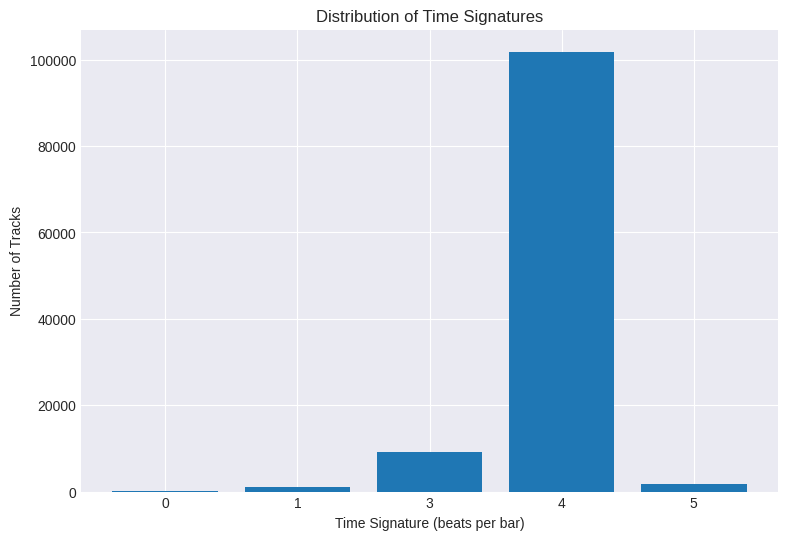

In [ ]:
counts = df['time_signature'].value_counts().sort_index()
plt.bar(counts.index.astype(str), counts.values)
plt.xlabel('Time Signature (beats per bar)')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Time Signatures')
plt.show()


Top 10 Genres with a 4/4 Time Signature


In [ ]:
top_10_genres_4_4_time = df[df['time_signature'] == 4].groupby('track_genre').size().sort_values(ascending=False).head(10)

print("Top 10 Genres with a 4/4 Time Signature:\n")
print(top_10_genres_4_4_time)



Top 10 Genres with a 4/4 Time Signature:

track_genre
pagode           993
forro            990
deep-house       988
chicago-house    988
house            986
salsa            986
j-idol           985
edm              984
reggaeton        983
dance            981
dtype: int64


Pie diagram od time signature distribution

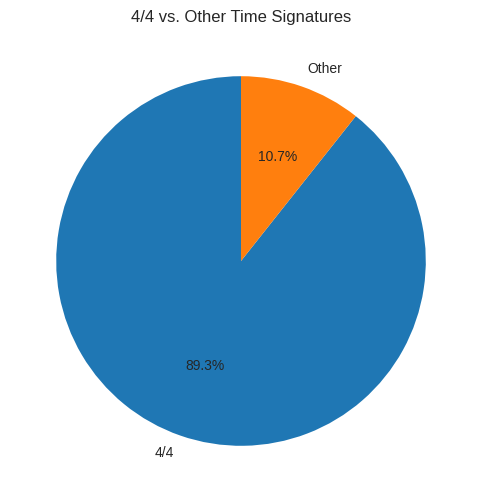

In [ ]:
import pandas as pd

ts_counts = df['time_signature'].value_counts()
common = ts_counts.loc[4]
others = ts_counts.drop(4).sum()
pie = pd.Series([common, others], index=['4/4','Other'])
pie.plot.pie(autopct='%1.1f%%', startangle=90, legend=False)
plt.ylabel('')
plt.title('4/4 vs. Other Time Signatures')
plt.show()


we can see here in box plot 4/4 time_sig got more energy than others

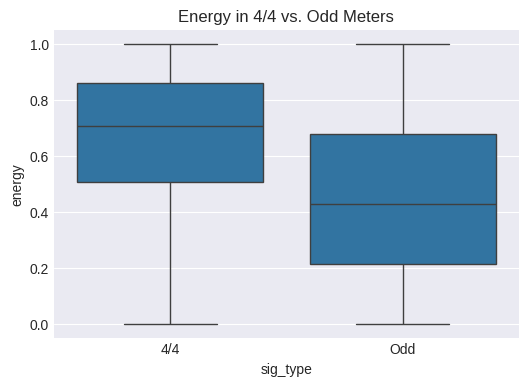

In [ ]:
import seaborn as sns
df['sig_type'] = df['time_signature'].apply(lambda x: '4/4' if x==4 else 'Odd')

plt.figure(figsize=(6,4))
sns.boxplot(x='sig_type', y='energy', data=df)
plt.title('Energy in 4/4 vs. Odd Meters')
plt.show()


### **ENERGY FEATURE ANALYSIS**

**energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

Top 20 Genres with the Highest Average Energy


In [ ]:
genre_avg_energy = df.groupby('track_genre')['energy'].mean().sort_values(ascending=False)
top_20_genres_energy = genre_avg_energy.head(20)

print("Top 20 Genres with the Highest Average Energy:\n")
print(top_20_genres_energy)

Top 20 Genres with the Highest Average Energy:

track_genre
death-metal          0.931470
grindcore            0.924201
metalcore            0.914485
happy                0.910971
hardstyle            0.901246
drum-and-bass        0.876635
black-metal          0.874897
heavy-metal          0.874003
party                0.871237
j-idol               0.868677
industrial           0.861745
breakbeat            0.853275
trance               0.845272
hardcore             0.842453
metal                0.840273
progressive-house    0.813359
punk-rock            0.809980
punk                 0.809673
grunge               0.803290
power-pop            0.801688
Name: energy, dtype: float64


Top 20 Artists with the Highest Average Energy


In [ ]:
artist_avg_energy = df.groupby('artists')['energy'].mean().sort_values(ascending=False)
top_20_artists_avg_energy = artist_avg_energy.head(20)

print("Top 20 Artists with the Highest Average Energy:\n")
print(top_20_artists_avg_energy)



Top 20 Artists with the Highest Average Energy:

artists
Nature Sounds;Nature Sounds Nature Music;Nature Sound Collection    1.000
Rain for Sleep                                                      1.000
Mike Der Bademeister;Schwalmrebellen                                1.000
Thunder Storm                                                       1.000
Willi Herren                                                        1.000
White Noise Research                                                1.000
NG Rezonance;Peter Berry                                            0.999
Klaus & Klaus;Jürgen Milski                                         0.999
HDMIRROR                                                            0.999
Mutiilation                                                         0.999
dj funk;TJR                                                         0.999
Ambient Rain;Rain Sleep Sounds                                      0.999
Ransom;Mad B                                           

### **KEY FEATURE ANALYSIS**

**key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1


Keys distribution across tracks

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


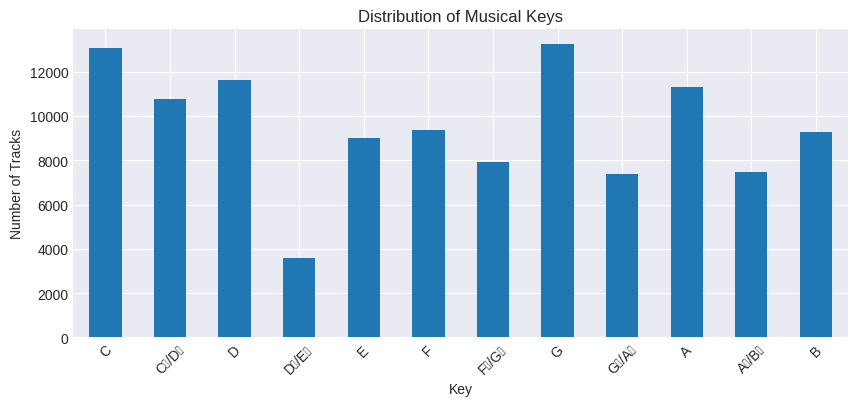

In [ ]:
import matplotlib.pyplot as plt

# map ints → labels
key_map = {
    0:'C',1:'C♯/D♭',2:'D',3:'D♯/E♭',4:'E',5:'F',
    6:'F♯/G♭',7:'G',8:'G♯/A♭',9:'A',10:'A♯/B♭',11:'B'
}

df['key_label'] = df['key'].map(key_map)
counts = df['key_label'].value_counts().reindex(key_map.values())

plt.figure(figsize=(10,4))
counts.plot.bar()
plt.xlabel('Key')
plt.ylabel('Number of Tracks')
plt.title('Distribution of Musical Keys')
plt.xticks(rotation=45)
plt.show()


On a piano keyboard (and in Western notation), the “white keys” are the seven natural notes—C, D, E, F, G, A, B—while the “black keys” are the five accidentals (the sharps/flats) that sit between them.



Distribution pf white and black keys

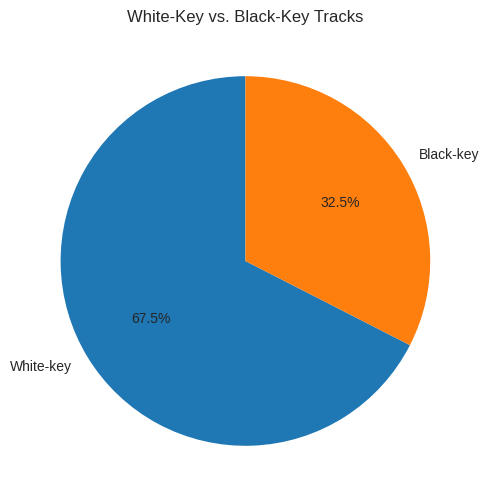

In [ ]:
white = ['C','D','E','F','G','A','B']
pie = df['key_label'].apply(lambda k: 'White‑key' if k in white else 'Black‑key').value_counts()
pie.plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('White‑Key vs. Black‑Key Tracks')
plt.show()


Distribution of modes among different keys

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9839 (\N{MUSIC SHARP SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9837 (\N{MUSIC FLAT SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


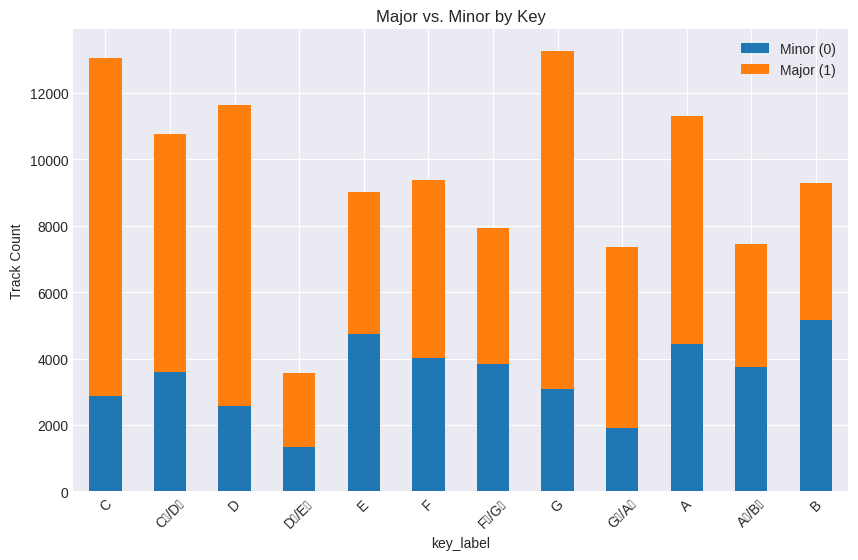

In [ ]:
combo = (
    df
    .groupby(['key_label','mode'])
    .size()
    .unstack(fill_value=0)
    .loc[key_map.values()]
)

combo.columns = ['Minor (0)','Major (1)']
combo.plot.bar(stacked=True, figsize=(10,6))
plt.ylabel('Track Count')
plt.title('Major vs. Minor by Key')
plt.xticks(rotation=45)
plt.show()


### **DISTRIBUTION PLOT OF ALL FEATURES**

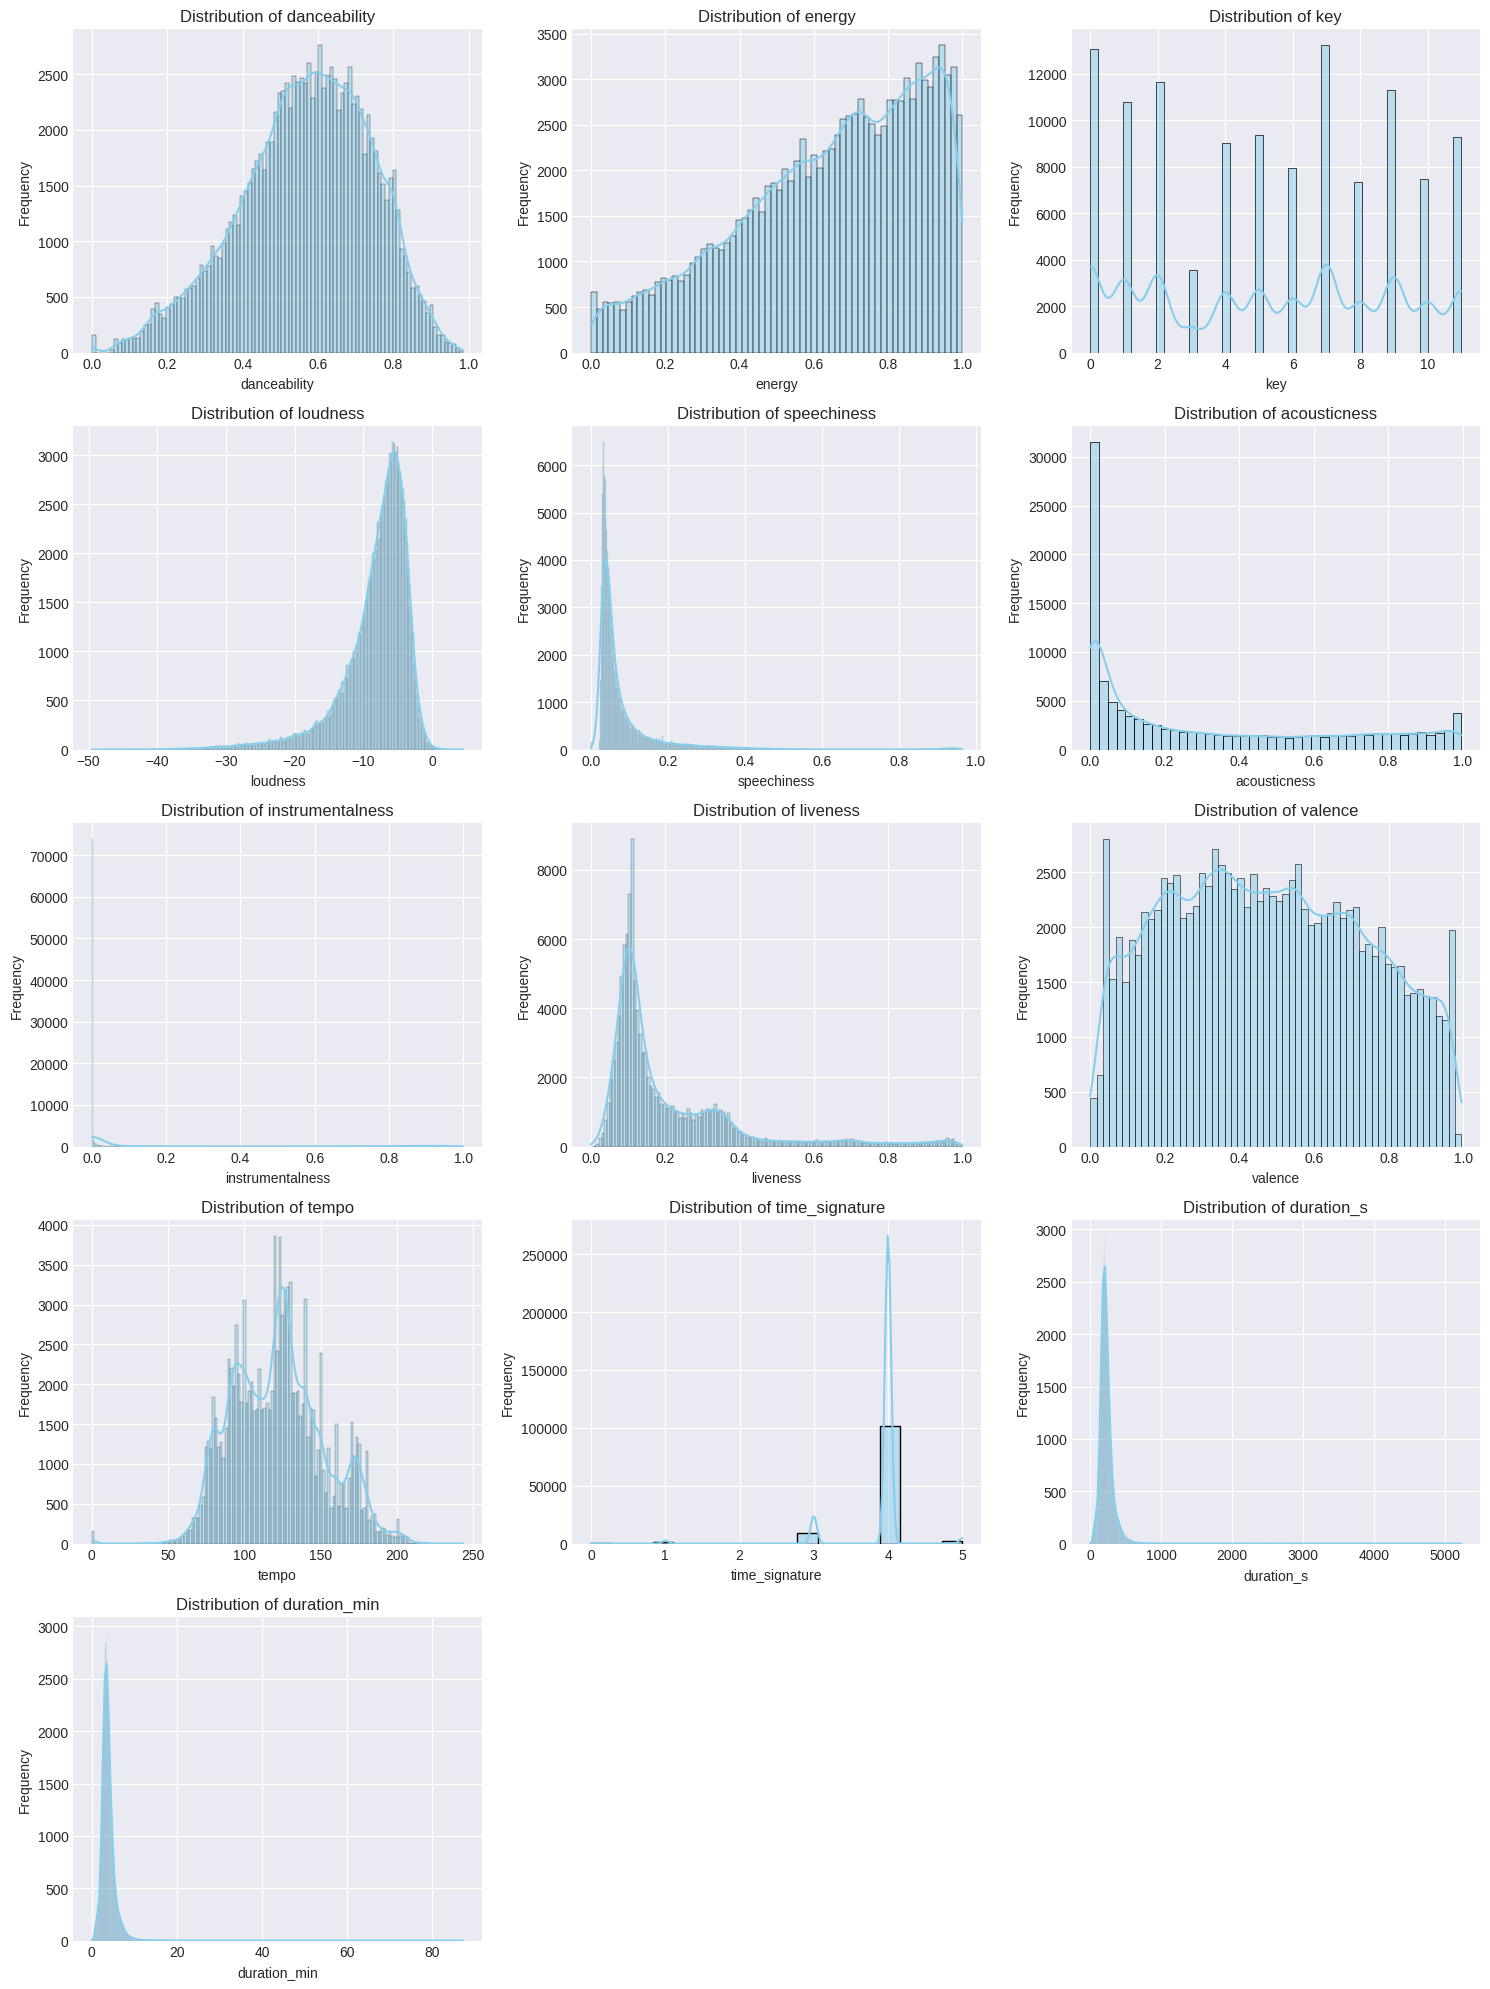

In [ ]:
# 1. Identify all numeric columns in the DataFrame
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# 2. Exclude columns we don’t want to plot:
#    - 'popularity' and 'duration_ms' (you might handle these separately)
#    - 'explicit' (a binary flag, better as a countplot)
#    Also skip any feature with ≤2 unique values (not very informative as a histogram)
features_to_plot = [
    col for col in numerical_features
    if col not in ['popularity', 'duration_ms', 'explicit']
       and df[col].nunique() > 2
]

# 3. Lay out a grid: 3 plots per row, enough rows to fit all features
n_features = len(features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols  # ceiling division

# 4. Create the matplotlib Figure + Axes array
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()  # makes it easy to index in a single loop

# 5. Loop over each feature, draw a histogram with KDE overlay
for i, feature in enumerate(features_to_plot):
    sns.histplot(
        df[feature],    # data
        kde=True,       # overlay kernel density estimate
        ax=axes[i],     # target subplot
        color='skyblue'
    )
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# 6. If there are any unused subplots (when n_features % n_cols != 0), remove them
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 7. Tidy up spacing and display
plt.tight_layout()
plt.show()


### **OUTLIERS**

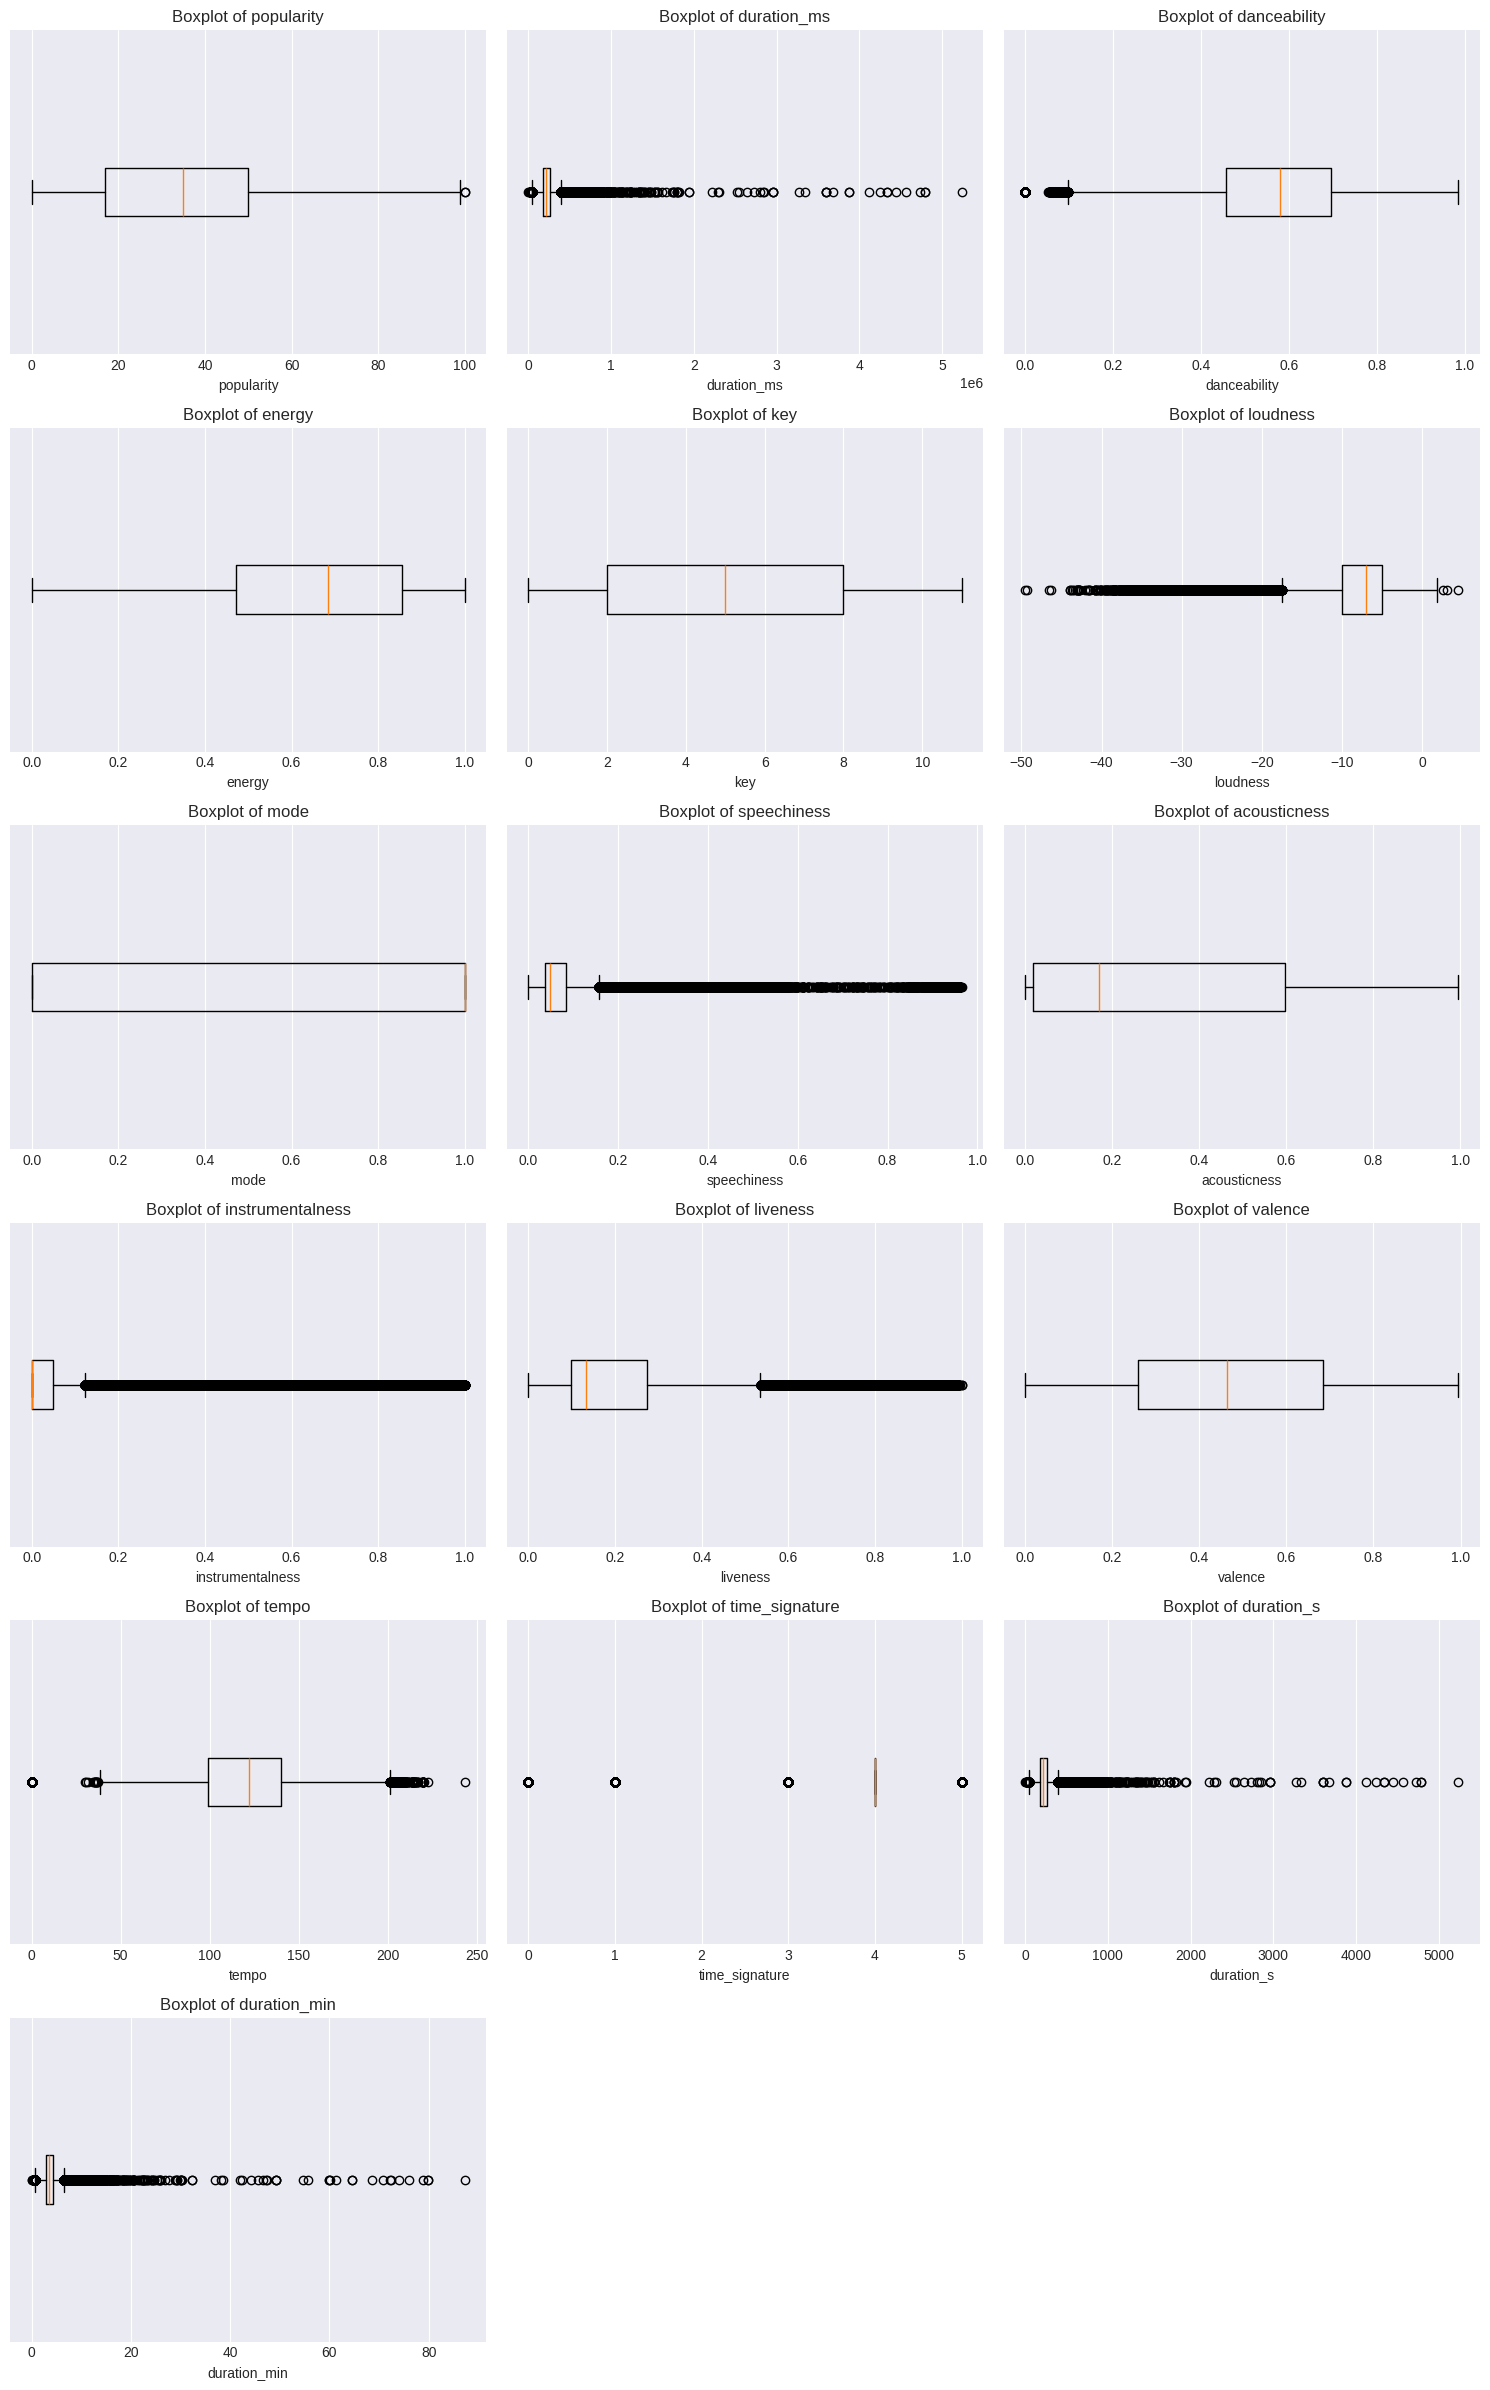

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Select numeric columns
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

# 2. (Optional) Exclude columns you don't want box‑plotted, e.g. identifiers
# numeric_features = [col for col in numeric_features if col not in ['popularity', 'duration_ms', 'explicit']]

# 3. Determine grid size: 3 plots per row
n_feats = len(numeric_features)
n_cols = 3
n_rows = (n_feats + n_cols - 1) // n_cols  # ceiling division

# 4. Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# 5. Loop over each feature and draw a boxplot
for i, feat in enumerate(numeric_features):
    # draw a horizontal boxplot for readability
    axes[i].boxplot(df[feat].dropna(), vert=False)
    axes[i].set_title(f'Boxplot of {feat}')
    axes[i].set_xlabel(feat)
    axes[i].set_yticks([])           # hide the y‑axis tick (no categories)

# 6. Remove any unused axes if n_feats % n_cols != 0
for j in range(n_feats, len(axes)):
    fig.delaxes(axes[j])

# 7. Adjust layout and show
plt.tight_layout()
plt.show()


1. Duration


Type: Right‑side (upper) outliers

Why: Most songs cluster between ~2–5 minutes, but you’ve got a long tail of extremely long tracks (EPs, live jams, podcasts) stretching out past 10 minutes (600 s) and even 80 minutes in your duration_min plot.


2. Speechiness

Type: Right‑side outliers

Why: While most tracks sit below ~0.1 (musical), there are a handful of high‐speech tracks (0.66–1.0) — think audiobooks, podcasts, or pure‐spoken word — creating a long tail.


3. Instrumentalness

Type: Right‑side outliers

Why: Instrumentalness is zero‐inflated (most songs have vocals), but you see a smattering of pure instrumentals (values up near 1.0) as outliers against the mass of 0.0.


4. Loudness

Type: Both‑sided, but mostly left‑side (very low dB) outliers

Why: The bulk of tracks cluster between about –15 dB and –5 dB, but there are a chunk of very quiet recordings (below –40 dB) and a few extremely hot masters (up near 0 dB).


5. Tempo

Type: Both‑sided outliers

Why: Most tempos fall between ~60–200 BPM, but you get a few ultra‑slow (< 30 BPM) and ultra‑fast (> 220 BPM) tunes (experimental, classical, speed metal, etc.).

6. Liveness

Type: Right‑side outliers

Why: Tracks recorded live (values > 0.7) stand apart from the studio bulk around 0.1–0.3, showing up as upper‐end outliers.

